# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [9]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

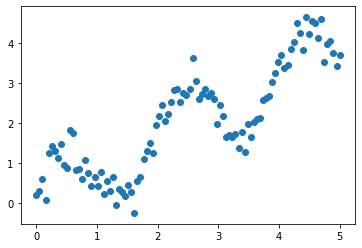

In [10]:
plt.scatter(x,y)

#### nonlinear

In [11]:
regr_lin = LinearRegression()

In [12]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [13]:
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.5082387611562091


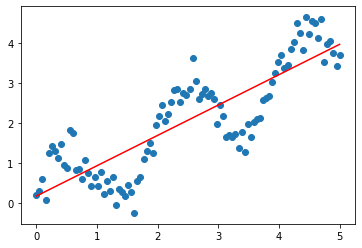

In [14]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [15]:
print(x.shape)

(100,)


In [17]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [19]:
regr_poly = LinearRegression()

In [20]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

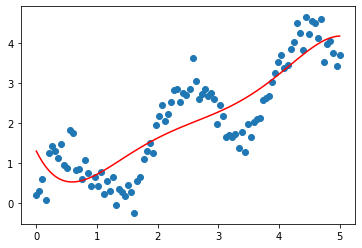

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [22]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-3.09976954  3.9608504  -1.77062703  0.35482793 -0.02594774]
interception:  1.2996533075661585


In [23]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.29965331, 1.15297667, 1.02516983, 0.91494601, 0.82107178,
       0.74236605, 0.67769905, 0.6259913 , 0.58621258, 0.55738092,
       0.53856158, 0.528866  , 0.52745083, 0.53351683, 0.54630791,
       0.5651101 , 0.58925049, 0.61809623, 0.65105353, 0.68756658,
       0.7271166 , 0.76922073, 0.8134311 , 0.85933372, 0.90654753,
       0.95472332, 1.00354275, 1.0527173 , 1.10198725, 1.15112066,
       1.19991237, 1.24818292, 1.29577759, 1.34256533, 1.38843778,
       1.4333082 , 1.47711047, 1.51979808, 1.56134308, 1.60173507,
       1.6409802 , 1.67910008, 1.71613084, 1.75212204, 1.78713569,
       1.82124521, 1.85453439, 1.88709641, 1.91903276, 1.95045228,
       1.98147007, 2.01220655, 2.04278633, 2.07333729, 2.10398949,
       2.13487417, 2.16612274, 2.19786573, 2.23023177, 2.26334659,
       2.29733198, 2.33230477, 2.36837581, 2.40564892, 2.44421993,
       2.48417558, 2.52559255, 2.56853643, 2.61306065, 2.65920555,
       2.70699724, 2.75644669, 2.80754863, 2.86028054, 2.91460

In [24]:
regr_poly.predict(X_poly)

array([1.29965331, 1.15297667, 1.02516983, 0.91494601, 0.82107178,
       0.74236605, 0.67769905, 0.6259913 , 0.58621258, 0.55738092,
       0.53856158, 0.528866  , 0.52745083, 0.53351683, 0.54630791,
       0.5651101 , 0.58925049, 0.61809623, 0.65105353, 0.68756658,
       0.7271166 , 0.76922073, 0.8134311 , 0.85933372, 0.90654753,
       0.95472332, 1.00354275, 1.0527173 , 1.10198725, 1.15112066,
       1.19991237, 1.24818292, 1.29577759, 1.34256533, 1.38843778,
       1.4333082 , 1.47711047, 1.51979808, 1.56134308, 1.60173507,
       1.6409802 , 1.67910008, 1.71613084, 1.75212204, 1.78713569,
       1.82124521, 1.85453439, 1.88709641, 1.91903276, 1.95045228,
       1.98147007, 2.01220655, 2.04278633, 2.07333729, 2.10398949,
       2.13487417, 2.16612274, 2.19786573, 2.23023177, 2.26334659,
       2.29733198, 2.33230477, 2.36837581, 2.40564892, 2.44421993,
       2.48417558, 2.52559255, 2.56853643, 2.61306065, 2.65920555,
       2.70699724, 2.75644669, 2.80754863, 2.86028054, 2.91460

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [25]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [26]:
sigma = 0.3

In [27]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [28]:
regr_rbf = LinearRegression()

In [29]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

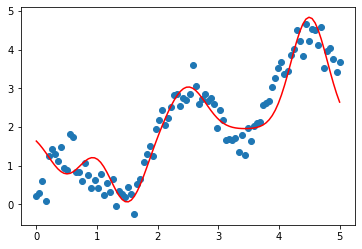

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [31]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.12014366 -1.85440165  1.12755725  0.03016448  2.92354134]
interception:  1.91702986842808


#### Comparison

In [32]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

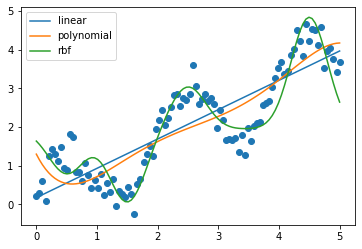

In [33]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [36]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5082387611562091


In [37]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4487273143701057


In [38]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23225369673652807
